# Analisis Komponen Utama #

## Tahapan Analisis ##

1. Load data dari kaggle
2. Import libraries
3. Cleaning data
4. Preprocessing data
5. Menentukan jumlah komponen utama
6. Transform data Fitur komponen utama
7. Klusterisasi data dengan KMeans

### Load data dari kaggle ###

In [4]:
!kaggle datasets download -d ankitchahal1/sales-data

Dataset URL: https://www.kaggle.com/datasets/ankitchahal1/sales-data
License(s): CC0-1.0




  0%|          | 0.00/77.5k [00:00<?, ?B/s]
100%|██████████| 77.5k/77.5k [00:00<00:00, 237kB/s]
100%|██████████| 77.5k/77.5k [00:00<00:00, 236kB/s]


### Import Libraries ###

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load data
data = pd.read_csv('sales_data_sample.csv', encoding='latin')


data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### Cleaning Data ###

In [20]:
columns_to_drop = ['ORDERNUMBER', 'ORDERDATE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CONTACTLASTNAME', 
                   'CONTACTFIRSTNAME', 'STATE', 'POSTALCODE', 'CUSTOMERNAME', 'PRODUCTCODE', 'CITY', 'TERRITORY']

for col in columns_to_drop:
    data = data.drop(col, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  COUNTRY          2823 non-null   object 
 11  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 264.8+ KB


### Preprocess Data ###

In [21]:
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,USA,Medium


In [22]:
data = pd.get_dummies(data, drop_first=True)

data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,STATUS_Disputed,STATUS_In Process,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2,2871.00,1,2,2003,95,False,False,...,False,False,False,False,False,False,False,True,False,True
1,34,81.35,5,2765.90,2,5,2003,95,False,False,...,False,False,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,3,7,2003,95,False,False,...,False,False,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,3,8,2003,95,False,False,...,False,False,False,False,False,False,False,True,True,False
4,49,100.00,14,5205.27,4,10,2003,95,False,False,...,False,False,False,False,False,False,False,True,True,False


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = scaler.fit_transform(data)

X = pd.DataFrame(X, columns=data.columns)

X.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,STATUS_Disputed,STATUS_In Process,...,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Medium,DEALSIZE_Small
0,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.142246,-0.070597,-0.121399,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,-0.980703,1.09637
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.142246,-0.070597,-0.121399,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,-0.980703,1.09637
2,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.142246,-0.070597,-0.121399,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,1.019676,-0.91210
3,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.142246,-0.070597,-0.121399,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,1.019676,-0.91210
4,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.142246,-0.070597,-0.121399,...,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014,1.019676,-0.91210


### Menentukan Komponen Utama ###

In [24]:
from sklearn.decomposition import PCA

model = PCA()

model.fit(X)

PCA()

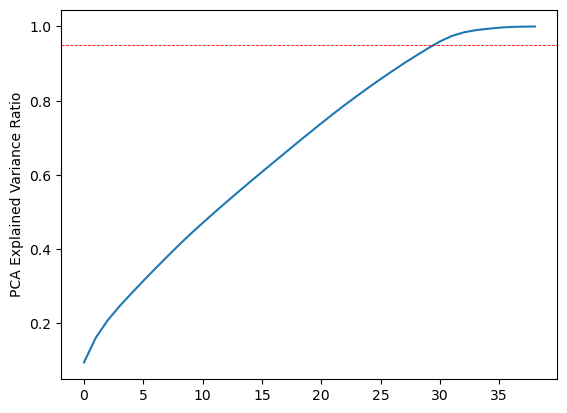

In [25]:
explained_var_ratio = model.explained_variance_ratio_
cumsum = np.cumsum(explained_var_ratio)
plt.plot(cumsum)
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=0.6)
plt.ylabel('PCA Explained Variance Ratio')
plt.show()

In [26]:
n_comp = np.argmax(cumsum>0.95)
n_comp

30

### Transform data ###

In [63]:
pca = PCA(n_components=4)

pca.fit(X)

PCA(n_components=4)

In [64]:
X_pca = pca.transform(X)

X_pca

array([[-8.82333183e-01,  5.77670753e-01, -1.78534139e+00,
        -1.84852976e+00],
       [-1.21747300e+00,  7.60011394e-02, -1.74510480e+00,
        -6.45417955e-01],
       [ 1.29744177e+00, -5.85615772e-01, -1.17776158e+00,
        -6.58658749e-01],
       ...,
       [ 1.36287603e+00,  5.22755051e+00,  4.36746084e+00,
         2.81818237e+00],
       [-2.22006300e+00,  2.34785327e+00, -1.02772065e+00,
         2.65660492e-03],
       [ 4.25582408e-01,  4.08306014e+00,  4.48292613e+00,
        -2.24501689e+00]])

### Klusterisasi data dengan KMeans ###

In [66]:
from sklearn.cluster import KMeans

inertia = []

for num in range(1,11):
    model = KMeans(n_clusters=num)
    model.fit(X_pca)
    inertia.append(model.inertia_)

c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\septi\anaconda3\Lib\site-packages\sklearn\clust

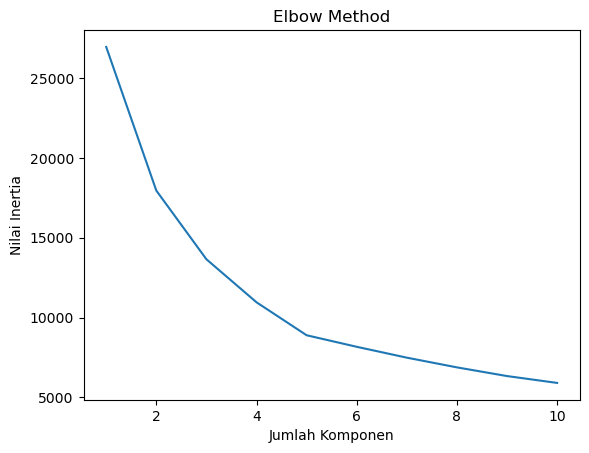

In [67]:
plt.plot(range(1,11), inertia)
plt.xlabel('Jumlah Komponen')
plt.ylabel('Nilai Inertia')
plt.title('Elbow Method')
plt.show()

In [80]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

c:\Users\septi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [81]:
label = kmeans.predict(X_pca)

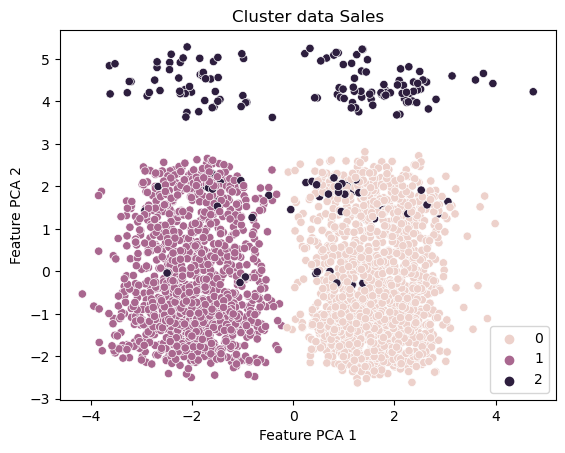

In [82]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],hue=label)
plt.xlabel('Feature PCA 1')
plt.ylabel('Feature PCA 2')
plt.title('Cluster data Sales')
plt.show()